<a href="https://colab.research.google.com/github/sirishti746/Agentic-AI/blob/main/Agentic_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# set up API key properly

In [1]:
import os
from google.colab import userdata
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

# Install required packages

In [2]:
!pip install -U langchain langgraph langchain-tavily langchain-groq

In [3]:
from langchain_groq import ChatGroq
from langchain_tavily import TavilySearch
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool


In [4]:
search = TavilySearch()
search.invoke("what is current USD vs INR price")

{'query': 'what is current USD vs INR price',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://dollarrupee.in/',
   'title': 'DOLLAR TO RUPEE TODAY AND FORECAST',
   'content': "Current USD to INR exchange rate equals 88.6390 Rupees per 1 Dollar. Today's range: 88.6390-88.6390. Yesterday's rate 88.6390. The change for today 0.0000",
   'score': 0.9224337,
   'raw_content': None},
  {'url': 'https://wise.com/us/currency-converter/usd-to-inr-rate',
   'title': 'US dollars to Indian rupees Exchange Rate. Convert USD/INR - Wise',
   'content': 'USD to INR exchange rates today ; 1 USD, 88.67 INR ; 5 USD, 443.33 INR ; 10 USD, 886.65 INR ; 20 USD, 1,773.30 INR.',
   'score': 0.87166095,
   'raw_content': None},
  {'url': 'https://wise.com/us/currency-converter/usd-to-inr-rate?amount=1',
   'title': '1 US dollar to Indian rupees Exchange Rate. Convert USD/INR - Wise',
   'content': 'USD to INR exchange rates today ; 1 USD, 88.67 INR ; 5 USD, 443.33 IN

In [5]:
search.invoke("What do you think the job market is for data analysts?")

{'query': 'What do you think the job market is for data analysts?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://365datascience.com/career-advice/the-data-analyst-job-market/',
   'title': 'Data Analyst Job Market in 2024: Demands and Prospects',
   'content': 'Data visualization is a key skill required for data analyst jobs, highlighted in 20.7% of postings. Approximately 5% of listings on the data analyst job market emphasize the need for specific analytical skills: A data analyst job is very likely to require some programming skills. **Python** appears in 31.2% of job postings, standing out among the most required programming languages for a data analyst, recognized for its key role in data analysis and machine learning applications. **Machine learning** emerges as the most sought-after AI skill on the data analyst job market, noted in 7.4% of job postings. According to our data analyst job market research, **ETL skills** (Extract, Tran

# Tool to calculate EMI
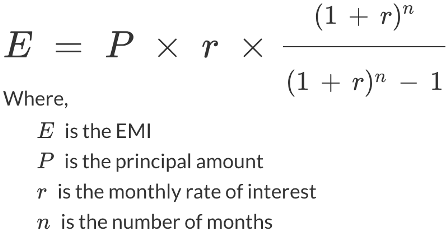

In [6]:
@tool
def calculate_emi(p: str,n: str,r:str)-> dict[str,float]:
  """
  inputs:
  p: priniciple in INR
  n : number of years
  r: rate of interest in % p.a.
  output:
  A dictionary containing interest,emi and amount
  """
  p= float(p)
  n = float(n)
  r = float(r)
  n = n * 12
  r = r/1200
  x = (1+r)**n
  emi = (p*r*x)/(x-1)
  interest = emi * n - p
  amount = emi * n
  return {"emi":emi,"amount":amount,"interest":interest}

# Get the model

In [7]:
model = ChatGroq(model="llama-3.3-70b-versatile")
model.invoke("hello how are you?")

AIMessage(content="Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 40, 'total_tokens': 88, 'completion_time': 0.088724253, 'prompt_time': 0.001207459, 'queue_time': 0.039352245, 'total_time': 0.089931712}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_fe312f6b04', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--c49becfa-5d4a-40fd-a950-a7fa886de783-0', usage_metadata={'input_tokens': 40, 'output_tokens': 48, 'total_tokens': 88})

# Adding a tools and creating a react agent
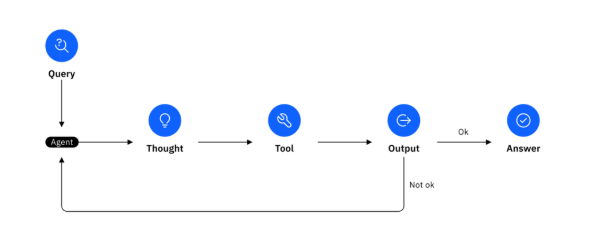

In [8]:
tools = [search,calculate_emi]
agent_executer = create_react_agent(model,tools,checkpointer=MemorySaver())

/tmp/ipython-input-2413176772.py:2: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_executer = create_react_agent(model,tools,checkpointer=MemorySaver())


In [10]:
def ai_agent(query: str,thread_id:str):
  config = {"configurable":{"thread_id": thread_id}}
  input_message = {
      "role" : "user",
      "content" : query
  }
  for step in agent_executer.stream(
      {"messages":input_message},config,stream_mode="values"):
    step["messages"][-1].pretty_print()

In [11]:
thread_id = "def456"
ai_agent("how is banking stocks sentiments in india",thread_id = thread_id)

================================ Human Message =================================

how is banking stocks sentiments in india
================================== Ai Message ==================================
Tool Calls:
  tavily_search (2mkfwrst8)
 Call ID: 2mkfwrst8
  Args:
    query: banking stocks sentiment in India
    topic: finance
================================= Tool Message =================================
Name: tavily_search

{"query": "banking stocks sentiment in India", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.forbes.com/advisor/in/investing/best-penny-stocks/", "title": "Best Penny Stocks To Buy Now In India November 2025", "content": "Subscribe To Newsletters Subscribe This consistent financial performance, its strategic position in the banking sector, and its efforts to restore investor confidence make YES Bank an intriguing choice for those looking to invest in penny stocks with significant growth prospects. Oricon Enter

In [12]:
ai_agent(
    query = "Principle is 10_00_000 INR for 5 years. Rate of interest is 9% p.a,calculate EMI",thread_id = thread_id
)


================================ Human Message =================================

Principle is 10_00_000 INR for 5 years. Rate of interest is 9% p.a,calculate EMI
================================== Ai Message ==================================
Tool Calls:
  calculate_emi (m32fb3ts6)
 Call ID: m32fb3ts6
  Args:
    n: 5
    p: 1000000
    r: 9
================================= Tool Message =================================
Name: calculate_emi

{"emi": 20758.355226353873, "amount": 1245501.3135812324, "interest": 245501.31358123245}
================================== Ai Message ==================================

The EMI for a loan of 10,00,000 INR for 5 years at an interest rate of 9% p.a. is 20,758.36 INR. The total amount paid over the 5-year period is 12,45,501.31 INR, and the total interest paid is 2,45,501.31 INR.


# Gemini Model


In [ ]:
!pip install -U langchain-google-genai

In [13]:
import os
os.environ["GOOGLE_API_KEY"] = userdata.get("GOOGLE_API_KEY")

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")
llm.invoke("what is 2+4")

AIMessage(content='2 + 4 = 6', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--b4d27fb4-c9f2-4629-8500-1a17289141cb-0', usage_metadata={'input_tokens': 7, 'output_tokens': 29, 'total_tokens': 36, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 22}})

In [15]:
tools = [search,calculate_emi]
agent_executer = create_react_agent(llm,tools,checkpointer=MemorySaver())

/tmp/ipython-input-3529748149.py:2: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_executer = create_react_agent(llm,tools,checkpointer=MemorySaver())


In [16]:
def ai_agent(query: str,thread_id:str):
  config = {"configurable":{"thread_id": thread_id}}
  input_message = {
      "role" : "user",
      "content" : query
  }
  for step in agent_executer.stream(
      {"messages":input_message},config,stream_mode="values"):
    step["messages"][-1].pretty_print()

In [17]:
ai_agent("Prinicple 10_00_000, number of years 5, rate of interest is 8.1 calculate emi",thread_id="def456")

================================ Human Message =================================

Prinicple 10_00_000, number of years 5, rate of interest is 8.1 calculate emi
================================== Ai Message ==================================
Tool Calls:
  calculate_emi (592dc88c-fdc2-49d4-aa10-59ce863d338f)
 Call ID: 592dc88c-fdc2-49d4-aa10-59ce863d338f
  Args:
    r: 8.1
    n: 5
    p: 10_00_000
================================= Tool Message =================================
Name: calculate_emi

{"emi": 20324.28652922556, "amount": 1219457.1917535337, "interest": 219457.19175353367}
================================== Ai Message ==================================

Your EMI will be 20,324.29, total interest will be 2,19,457.19 and total amount to be paid will be 12,19,457.19.


In [18]:
ai_agent("How is the sentiment of banking stock globally? ", thread_id="def945")

================================ Human Message =================================

How is the sentiment of banking stock globally? 
================================== Ai Message ==================================
Tool Calls:
  tavily_search (a076a452-4ff7-4762-977f-1174337897c0)
 Call ID: a076a452-4ff7-4762-977f-1174337897c0
  Args:
    query: sentiment of banking stock globally
    topic: finance
================================= Tool Message =================================
Name: tavily_search

{"query": "sentiment of banking stock globally", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://finance.yahoo.com/news/global-undervalued-small-caps-insider-093940403.html", "title": "Global Undervalued Small Caps With Insider Action For ...", "content": "In September 2025, global markets have been navigating a complex landscape with mixed signals from key economic indicators, such as the U.S.", "score": 0.7036111, "raw_content": null}, {"url": "https:/